In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pytorch_lightning as pl
import TrajNet_train
import utils
import torch

In [11]:
subj = utils.ExpInfo.getSubjIDs()[25]
task = 'one_dot'
print(subj, task)

K-Reg-S-1 one_dot


In [9]:
dataset_train, dataset_val = utils.LoadData.mouseMovementRollingData(subjID=subj, 
                                                                     task=task, 
                                                                     wSize=TrajNet_train.config['wSize'], 
                                                                     pos=TrajNet_train.config['pos'], 
                                                                     seed=0)


In [21]:
model = TrajNet_train.PL_model()
path_cp = utils.path_data / 'TrajNet_train' / f'{subj}_{task}_val.ckpt'
model = model.load_from_checkpoint(path_cp).double()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
x = torch.from_numpy(dataset_train[0:10]).double()
y = model(x)

In [36]:
d[0]

array([[ 0.00021053, -0.00063158],
       [ 0.        , -0.00063158],
       [ 0.00021053, -0.00231579],
       [ 0.00105263, -0.00315789],
       [ 0.00168421, -0.00463158],
       [ 0.00105263, -0.00273684],
       [ 0.00084211, -0.00273684],
       [ 0.00063158, -0.00189474],
       [ 0.00021053, -0.00105263],
       [ 0.00021053, -0.00042105],
       [ 0.00021053, -0.00147368],
       [ 0.00084211, -0.00252632],
       [ 0.00063158, -0.00168421],
       [ 0.00042105, -0.00189474],
       [ 0.        , -0.00126316],
       [ 0.00021053, -0.00147368],
       [ 0.        , -0.00084211],
       [-0.00021053, -0.00294737],
       [ 0.00021053, -0.00126316],
       [ 0.00042105, -0.00126316],
       [ 0.00063158, -0.00126316],
       [ 0.00084211, -0.00210526],
       [ 0.00105263, -0.00210526],
       [ 0.00021053, -0.00147368],
       [ 0.        , -0.00084211],
       [ 0.00042105, -0.00210526],
       [ 0.00084211, -0.00231579],
       [ 0.00105263, -0.00273684],
       [ 0.00105263,

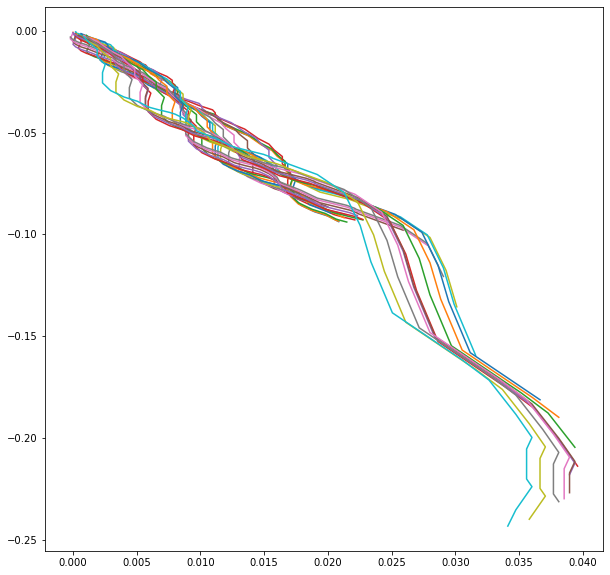

In [42]:
d = dataset_train[0:30]
nLine = d.shape[0]
nTime = d.shape[1]

d = d.cumsum(axis=1)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for i in range(nLine):
    ax.plot(d[i, :, 0], d[i, :, 1])


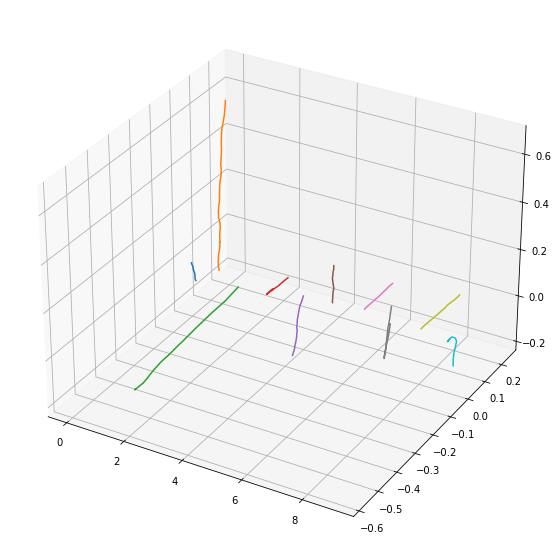

In [39]:
d = dataset_train[range(0, 1000, 100)]
d = d.cumsum(axis=1)
nLine = d.shape[0]
nTime = d.shape[1]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(nLine):
    ax.plot(np.ones(nTime)*i, d[i, :, 0], d[i, :, 1])


